# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (8/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk8.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,81180,2,VEGETARIAN CHILI (MADE W/ MEAT SUBSTITUTE) (5....,474,13.51,41.41,5.04,3.3,28.39,...,1,1.58,NaN,0.0,0.0,NaN,NaN,81180_NHANES_2013_2014,474; 13.51; 41.41; 5.04; 3.3; 28.39,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,81182,2,"CHOCOLATE MILK, NFS (201.5); CHEESE, AMERICAN ...",930,33.12,163.93,70.88,9.8,17.01,...,5,0.16,NaN,0.0,0.0,0.0,NaN,81182_NHANES_2013_2014,930; 33.12; 163.93; 70.88; 9.8; 17.01,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,81188,2,"MILK, REDUCED FAT (2%) (320.25); ICE CREAM SAN...",2235,78.26,316.99,122.83,17.1,73.76,...,1,0.36,NaN,0.0,0.0,NaN,NaN,81188_NHANES_2013_2014,2235; 78.26; 316.99; 122.83; 17.1; 73.76,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,81191,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED FAT (2...",2064,57.80,312.75,169.14,18.9,65.79,...,5,2.15,NaN,0.0,0.0,NaN,NaN,81191_NHANES_2013_2014,2064; 57.8; 312.75; 169.14; 18.9; 65.79,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,81220,2,"MILK, LOW FAT (1%) (183); MILK SHAKE, FAST FOO...",1892,53.52,274.99,92.58,17.8,67.04,...,3,5.00,NaN,0.0,0.0,NaN,NaN,81220_NHANES_2013_2014,1892; 53.52; 274.99; 92.58; 17.8; 67.04,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,92228,2,"CHEESEBURGER, 1 MEDIUM PATTY, WITH CONDIMENTS,...",1215,68.47,97.74,34.97,13.9,60.84,...,1,0.49,NaN,0.0,0.0,0.0,NaN,92228_NHANES_2015_2016,1215; 68.47; 97.74; 34.97; 13.9; 60.84,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,92230,2,"SOY MILK (76.25); SOY MILK (198.25); CHEESE, C...",1410,55.83,223.82,43.27,25.0,36.94,...,3,4.94,NaN,0.0,0.0,NaN,NaN,92230_NHANES_2015_2016,1410; 55.83; 223.82; 43.27; 25.0; 36.94,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,92237,2,"MILK, REDUCED FAT (2%) (488); BEEF, ROAST, ROA...",1658,101.02,203.80,42.07,8.6,49.15,...,3,0.74,NaN,0.0,0.0,NaN,NaN,92237_NHANES_2015_2016,1658; 101.02; 203.8; 42.07; 8.6; 49.15,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,92241,2,"MILK, REDUCED FAT (2%) (244); HAMBURGER, 1 MED...",1511,65.74,199.52,73.01,15.4,52.69,...,4,1.19,NaN,0.0,0.0,NaN,NaN,92241_NHANES_2015_2016,1511; 65.74; 199.52; 73.01; 15.4; 52.69,USER:\n\nPlease analyze the patient's dietary ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 51. I.e., these rows need post-processing.
Consistent rows: 1077. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
24,24,81341,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED FAT (2...",1953,69.56,246.28,74.91,22.4,77.62,...,3,3.58,NaN,0.0,0.0,0.0,NaN,81341_NHANES_2013_2014,1953; 69.56; 246.28; 74.91; 22.4; 77.62,USER:\n\nPlease analyze the patient's dietary ...
79,79,81775,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED SUGAR,...",2510,127.91,332.45,178.83,22.3,76.53,...,3,5.00,NaN,0.0,0.0,0.0,NaN,81775_NHANES_2013_2014,2510; 127.91; 332.45; 178.83; 22.3; 76.53,USER:\n\nPlease analyze the patient's dietary ...
163,163,82503,2,"MILK, WHOLE (274.5); SALTY SNACKS, CORN BASED/...",1606,35.52,287.58,185.40,7.3,37.33,...,4,1.52,NaN,0.0,0.0,1.0,NaN,82503_NHANES_2013_2014,1606; 35.52; 287.58; 185.4; 7.3; 37.33,USER:\n\nPlease analyze the patient's dietary ...
165,165,82522,2,"MILK, REDUCED FAT (2%) (488); MILK, REDUCED FA...",1937,76.89,199.41,97.49,10.1,95.55,...,2,1.34,NaN,0.0,0.0,NaN,NaN,82522_NHANES_2013_2014,1937; 76.89; 199.41; 97.49; 10.1; 95.55,USER:\n\nPlease analyze the patient's dietary ...
169,169,82588,2,"CHICK, WING, FRIED, NO COAT, SKIN EATEN, NS TY...",3655,164.92,357.80,179.43,11.6,174.39,...,4,0.54,NaN,0.0,0.0,0.0,0.0,82588_NHANES_2013_2014,3655; 164.92; 357.8; 179.43; 11.6; 174.39,USER:\n\nPlease analyze the patient's dietary ...
202,202,82930,2,"MILK, REDUCED FAT (2%) (183); MILK, REDUCED FA...",1698,44.15,253.48,113.87,22.7,58.77,...,5,5.00,NaN,0.0,0.0,NaN,NaN,82930_NHANES_2013_2014,1698; 44.15; 253.48; 113.87; 22.7; 58.77,USER:\n\nPlease analyze the patient's dietary ...
203,203,82942,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED FAT (2...",2327,107.31,326.97,147.56,16.6,67.54,...,3,1.92,NaN,0.0,0.0,NaN,NaN,82942_NHANES_2013_2014,2327; 107.31; 326.97; 147.56; 16.6; 67.54,USER:\n\nPlease analyze the patient's dietary ...
214,214,83036,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED FAT (2...",1727,51.42,243.49,110.87,17.4,64.83,...,1,0.70,NaN,0.0,0.0,0.0,NaN,83036_NHANES_2013_2014,1727; 51.42; 243.49; 110.87; 17.4; 64.83,USER:\n\nPlease analyze the patient's dietary ...
228,228,83134,2,"MEAT LOAF W/ BEEF, W/ TOMATO SAUCE (28.5); EGG...",1692,60.66,254.88,129.75,17.4,51.07,...,3,0.11,NaN,0.0,0.0,NaN,NaN,83134_NHANES_2013_2014,1692; 60.66; 254.88; 129.75; 17.4; 51.07,USER:\n\nPlease analyze the patient's dietary ...
241,241,83270,2,"CHEESE, SWISS (21); CHICKEN, BREAST, ROASTED/B...",1565,97.31,125.69,21.07,8.3,74.37,...,5,0.35,NaN,0.0,0.0,0.0,0.0,83270_NHANES_2013_2014,1565; 97.31; 125.69; 21.07; 8.3; 74.37,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1077, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,81180,2,VEGETARIAN CHILI (MADE W/ MEAT SUBSTITUTE) (5....,474,13.51,41.41,5.04,3.3,28.39,...,NaN,81180_NHANES_2013_2014,474; 13.51; 41.41; 5.04; 3.3; 28.39,594; 16.75; 70.81; 8.11; 3.5; 26.95,594,16.75,70.81,8.11,3.5,26.95
1,1,81182,2,"CHOCOLATE MILK, NFS (201.5); CHEESE, AMERICAN ...",930,33.12,163.93,70.88,9.8,17.01,...,NaN,81182_NHANES_2013_2014,930; 33.12; 163.93; 70.88; 9.8; 17.01,1136; 37.91; 192.78; 85.11; 12.3; 25.45,1136,37.91,192.78,85.11,12.3,25.45
2,2,81188,2,"MILK, REDUCED FAT (2%) (320.25); ICE CREAM SAN...",2235,78.26,316.99,122.83,17.1,73.76,...,NaN,81188_NHANES_2013_2014,2235; 78.26; 316.99; 122.83; 17.1; 73.76,2411; 84.84; 346.85; 142.1; 12.6; 78.0,2411,84.84,346.85,142.10,12.6,78.00
3,3,81191,2,"CHOCOLATE MILK, READY TO DRINK, REDUCED FAT (2...",2064,57.80,312.75,169.14,18.9,65.79,...,NaN,81191_NHANES_2013_2014,2064; 57.8; 312.75; 169.14; 18.9; 65.79,2235; 59.82; 356.86; 195.1; 13.3; 66.9,2235,59.82,356.86,195.10,13.3,66.90
4,4,81220,2,"MILK, LOW FAT (1%) (183); MILK SHAKE, FAST FOO...",1892,53.52,274.99,92.58,17.8,67.04,...,NaN,81220_NHANES_2013_2014,1892; 53.52; 274.99; 92.58; 17.8; 67.04,1895; 57.82; 290.11; 113.97; 16.3; 58.09,1895,57.82,290.11,113.97,16.3,58.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,92195,2,"BACON CHEESEBURGER, 1 SMALL PATTY, WITH CONDIM...",2230,92.57,235.98,107.17,9.9,102.95,...,NaN,92195_NHANES_2015_2016,2230; 92.57; 235.98; 107.17; 9.9; 102.95,2138; 69.96; 274.11; 141.1; 12.3; 84.7,2138,69.96,274.11,141.10,12.3,84.70
1123,1123,92228,2,"CHEESEBURGER, 1 MEDIUM PATTY, WITH CONDIMENTS,...",1215,68.47,97.74,34.97,13.9,60.84,...,NaN,92228_NHANES_2015_2016,1215; 68.47; 97.74; 34.97; 13.9; 60.84,1338; 61.82; 119.81; 49.1; 11.3; 68.1,1338,61.82,119.81,49.10,11.3,68.10
1124,1124,92230,2,"SOY MILK (76.25); SOY MILK (198.25); CHEESE, C...",1410,55.83,223.82,43.27,25.0,36.94,...,NaN,92230_NHANES_2015_2016,1410; 55.83; 223.82; 43.27; 25.0; 36.94,1548; 60.15; 243.11; 49.17; 24.5; 42.67,1548,60.15,243.11,49.17,24.5,42.67
1125,1125,92237,2,"MILK, REDUCED FAT (2%) (488); BEEF, ROAST, ROA...",1658,101.02,203.80,42.07,8.6,49.15,...,NaN,92237_NHANES_2015_2016,1658; 101.02; 203.8; 42.07; 8.6; 49.15,1935; 103.1; 233.8; 47.11; 9.6; 67.61,1935,103.10,233.80,47.11,9.6,67.61


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,58318.5850,183.8050,0.1182,241.4924,0.9249
DRxIPROT,192.4115,9.6567,0.1541,13.8712,0.8897
DRxICARB,1583.2779,30.4255,0.1613,39.7904,0.8836
DRxISUGR,579.2103,16.3557,0.2250,24.0668,0.8592
DRxIFIBE,15.9624,2.6073,0.1915,3.9953,0.8077
DRxITFAT,236.6093,10.8080,0.1775,15.3821,0.8546


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-8.549678,0.000000
DRxIPROT,-7.653953,0.000000
DRxICARB,-12.655733,0.000000
DRxISUGR,-4.800429,0.000002
DRxIFIBE,9.994251,0.000000
DRxITFAT,2.996909,0.002790


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

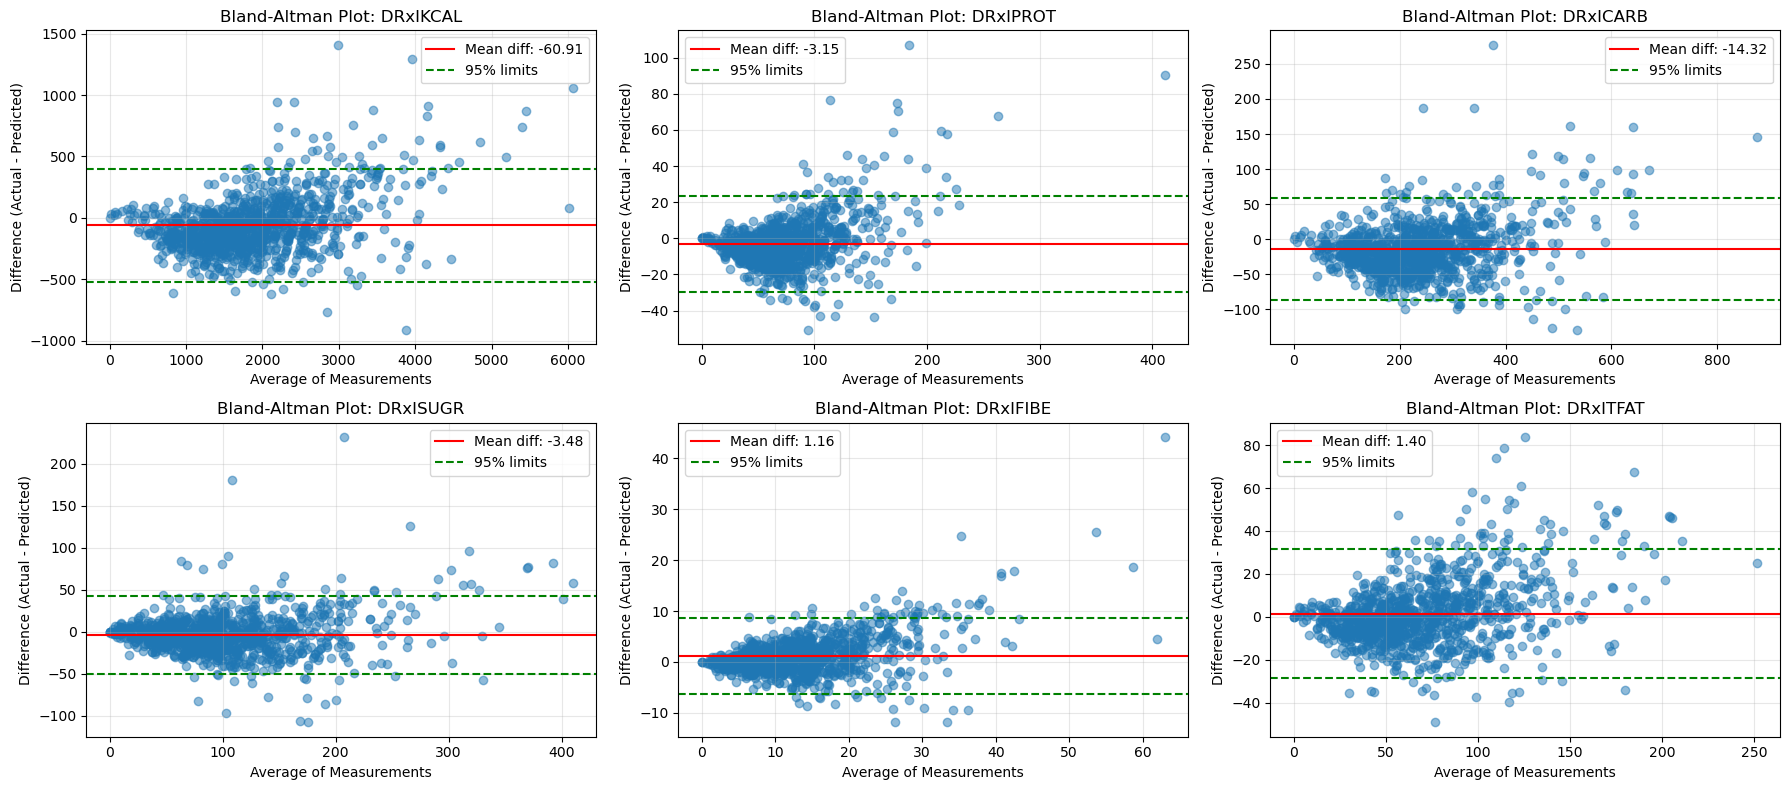

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.946728
DRxISUGR 0.921353
DRxIPROT 0.920910
DRxICARB 0.918695
DRxITFAT 0.904991
DRxIFIBE 0.848907

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9906


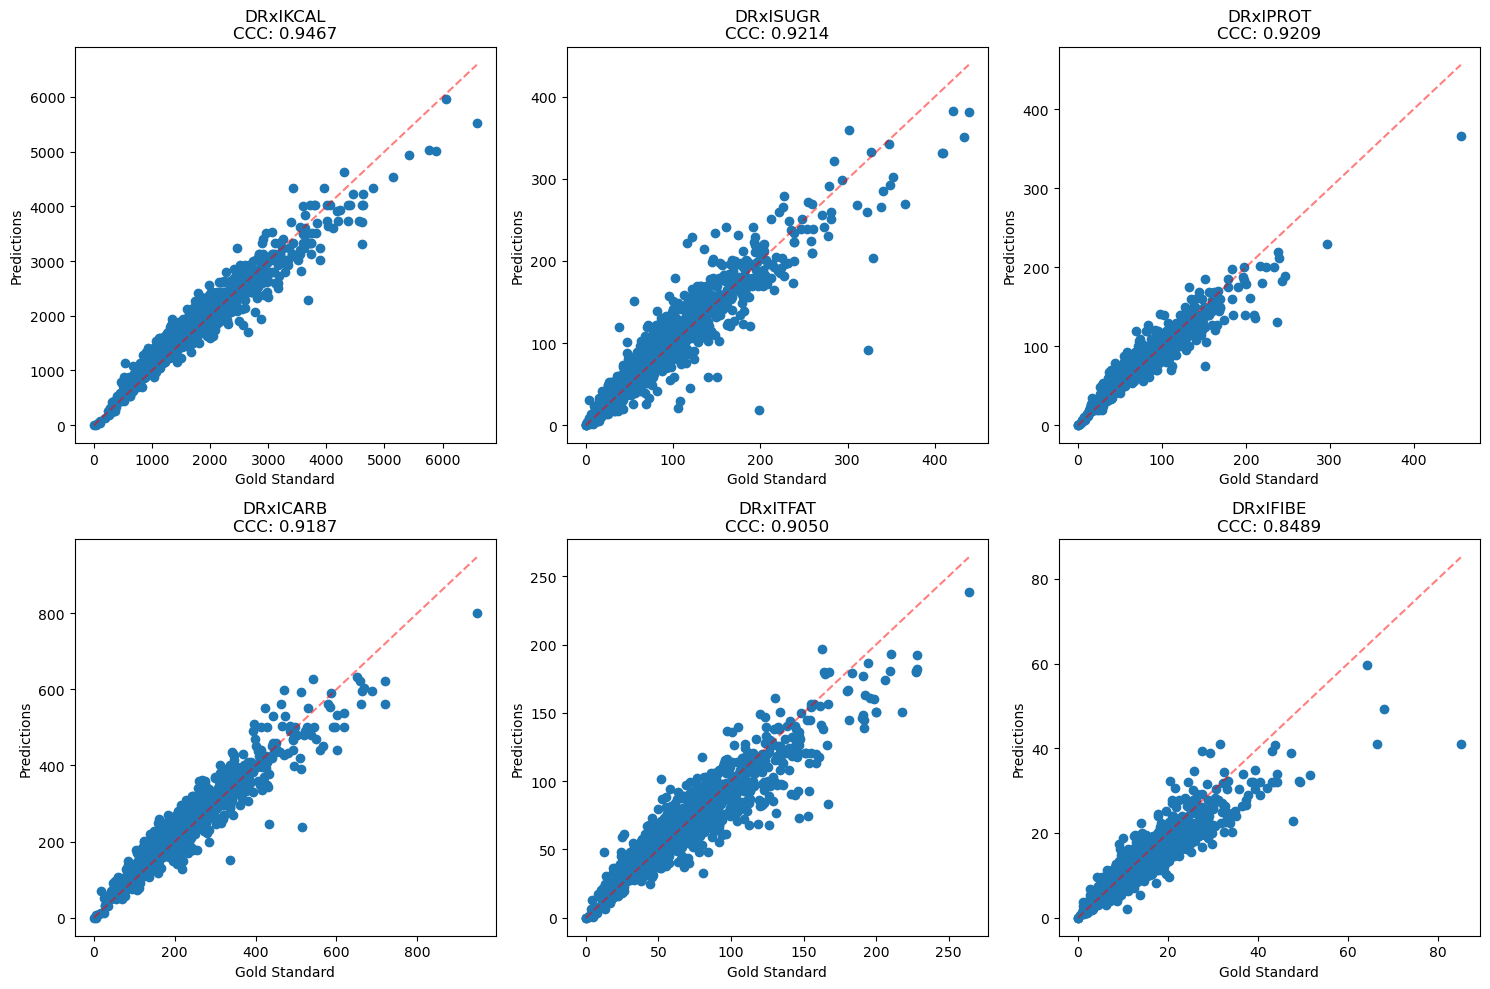

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()